In [14]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
text = cv2.imread('../data/text1.jpg')

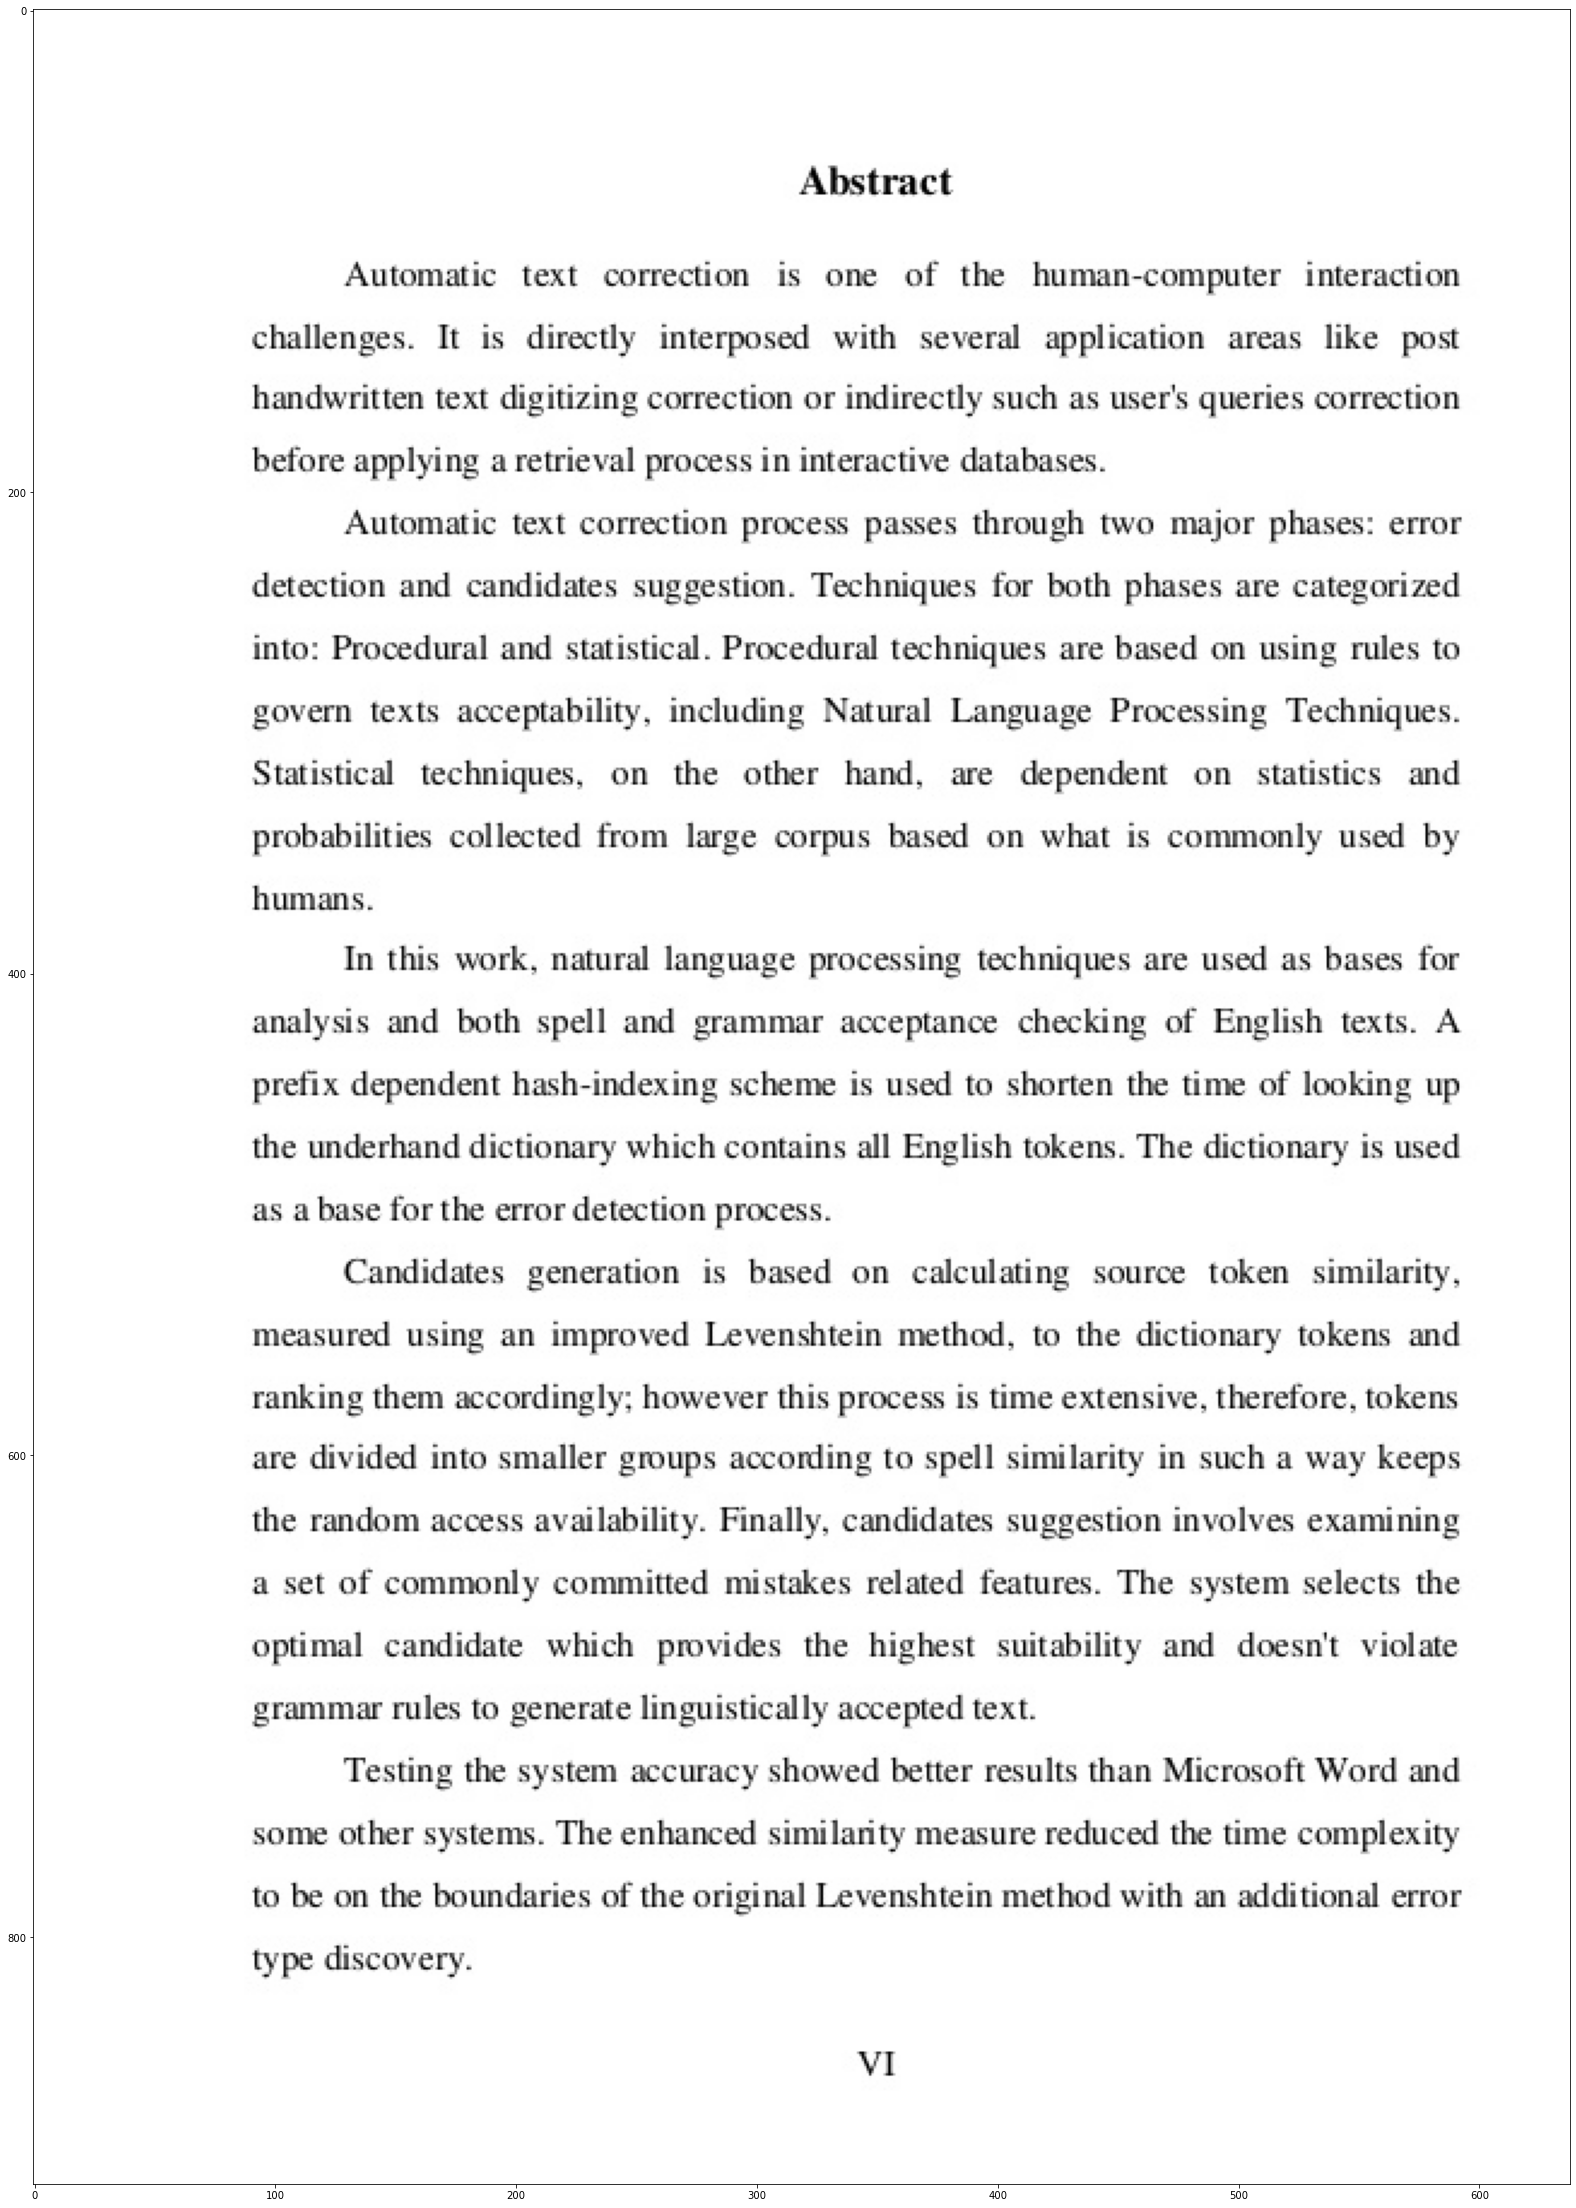

In [17]:
plt.figure(figsize=(50,40))
plt.imshow(text)

In [56]:
gray.shape

(903, 638)

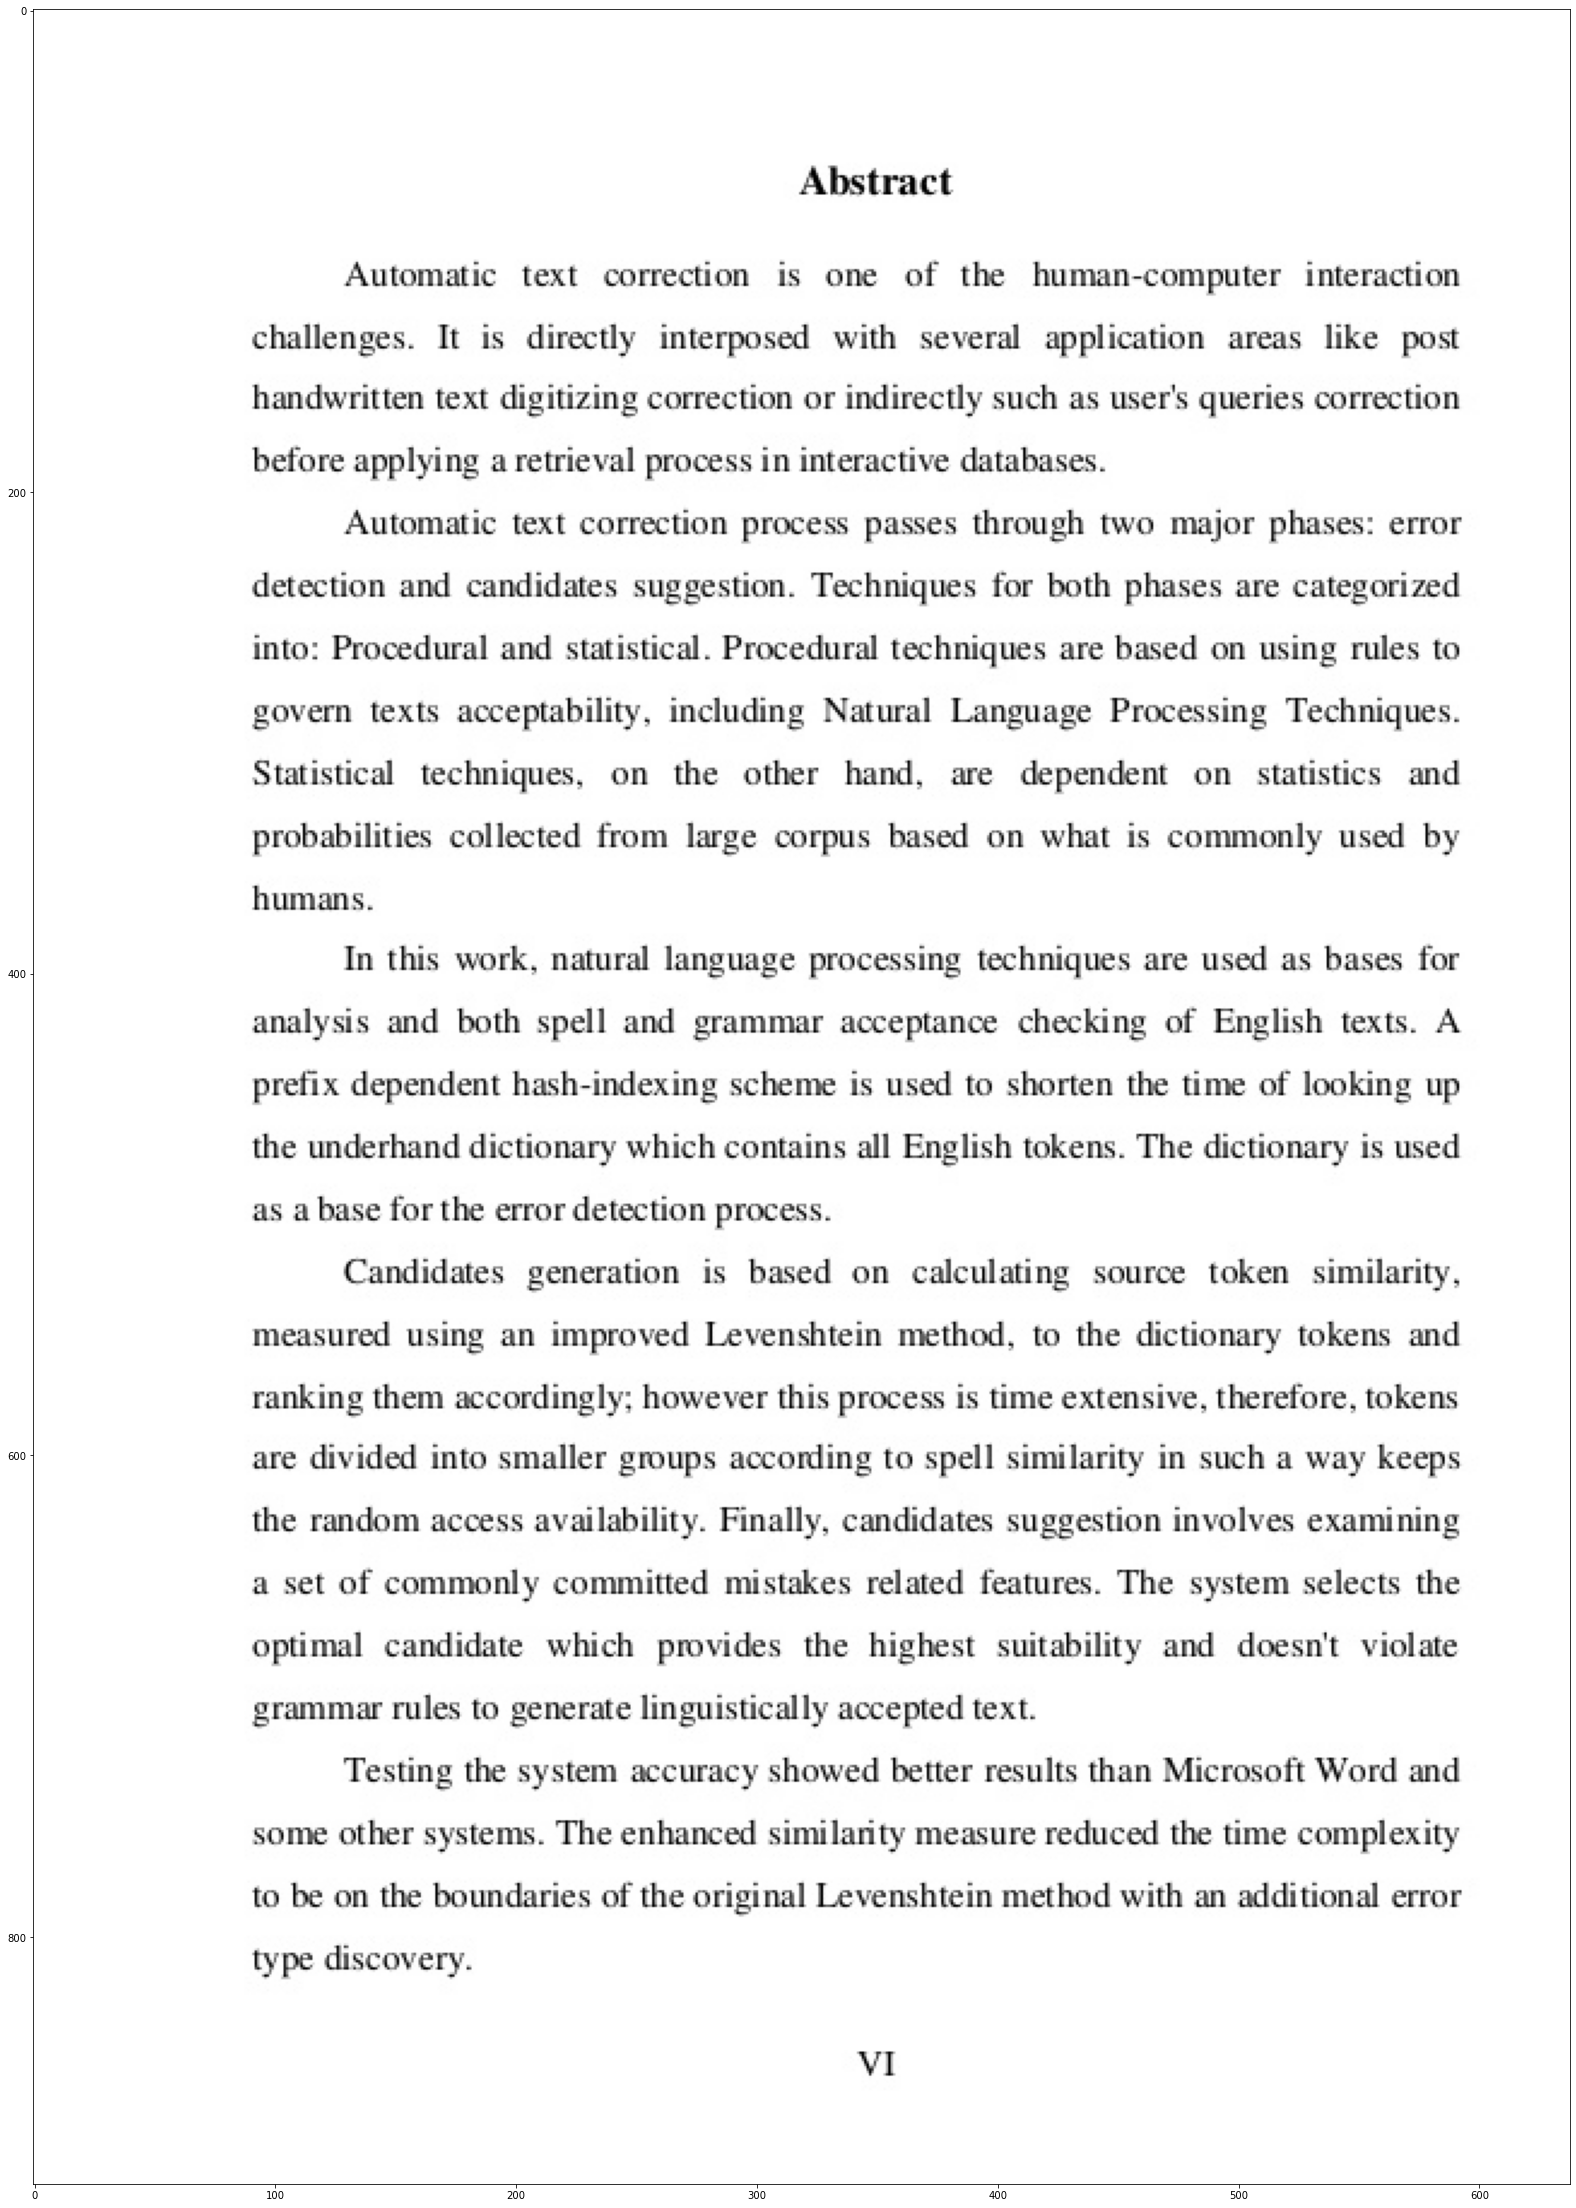

In [46]:
gray = cv2.cvtColor(text, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(50,40))
plt.imshow(text)

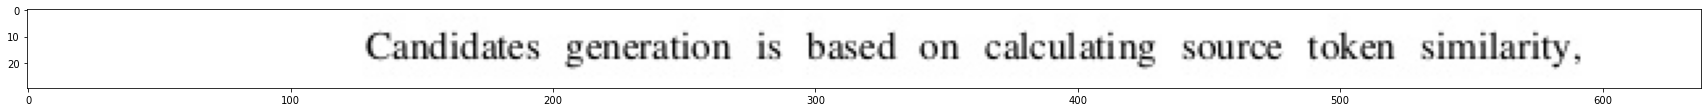

In [35]:
line_interval = [510,540]
plt.figure(figsize=(30,20))

plt.imshow(text[line_interval[0]:line_interval[1],:])

In [57]:
text_res

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 247,
        205, 238, 243, 237, 246, 226, 227, 238, 228, 236, 222, 237, 226,
        242, 197, 252, 207, 246, 226, 242, 197, 251, 226, 228, 236, 208,
        243, 225, 233, 243, 236, 235, 238, 255, 255, 255, 255, 252, 209,
        226, 225, 247, 225, 233, 241, 215, 246, 218, 247, 225, 233, 240,
        214, 245, 232, 239, 218, 251, 208, 249, 208, 247, 226, 246, 224,
        252, 215, 246, 218, 254, 255, 255, 255, 254, 230, 229, 236, 234,
        238, 255, 255, 255, 255, 253, 197, 242, 223, 252, 226, 228, 235,
        229, 228, 246, 225, 233, 243, 227, 241, 208, 236, 254, 255, 255,
        255, 228, 243, 235, 239, 228, 236, 222, 244

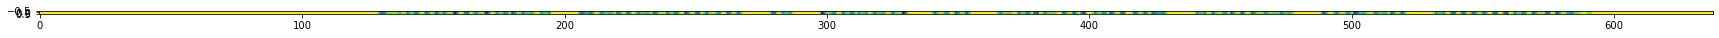

In [67]:
scale_percent = 100
width = int(gray.shape[1]*100/100)
height = 1
dim = (width, height)
text_res = cv2.resize(gray[line_interval[0]:line_interval[1],:],dim, interpolation = cv2.INTER_AREA)

plt.figure(figsize=(30,200))

plt.imshow(text_res)

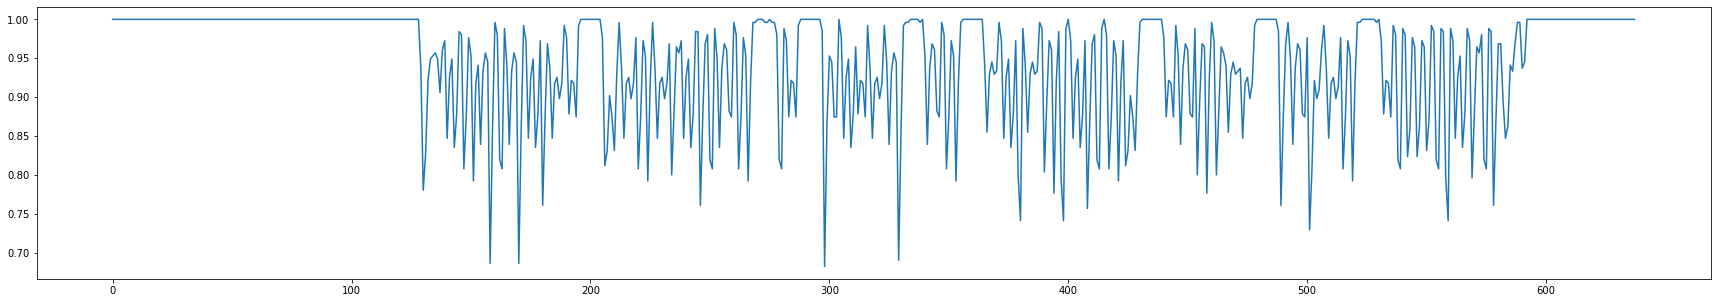

In [71]:
plt.figure(figsize=(30,5))
plt.plot(np.arange(0,text_res.shape[1]),text_res.reshape(-1)/255)

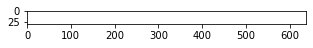

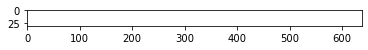

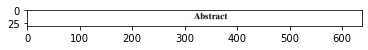

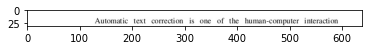

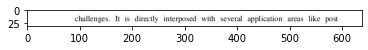

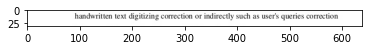

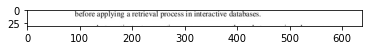

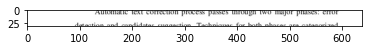

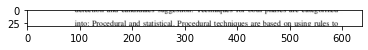

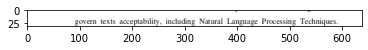

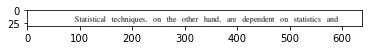

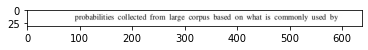

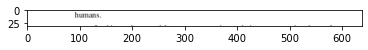

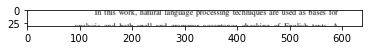

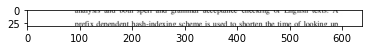

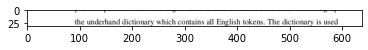

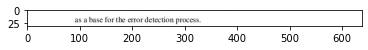

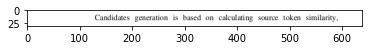

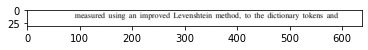

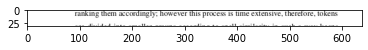

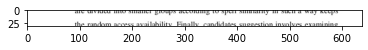

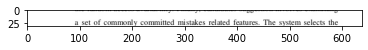

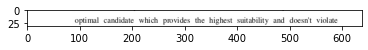

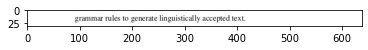

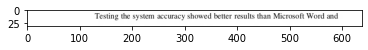

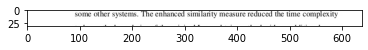

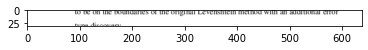

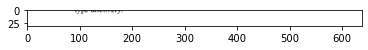

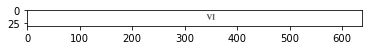

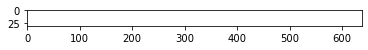

In [77]:
vertical_interval = 30
plt.figure(figsize=(30,5))

for interval in range(0,text.shape[0]-vertical_interval,vertical_interval):
    plt.imshow(text[interval:interval+vertical_interval,:])
    plt.show()
    

In [81]:
int((text.shape[1]-horizontal_interval)/horizontal_interval)

20

In [141]:
horizontal_interval = 30
# columns = np.zeros((int((gray.shape[1]-horizontal_interval)/horizontal_interval),gray.shape[1],horizontal_interval))
columns = np.zeros((int((gray.shape[1]-horizontal_interval)/horizontal_interval),gray.shape[0],1))

for interval in range(0,gray.shape[1]-horizontal_interval,horizontal_interval):
#     plt.figure(figsize=(horizontal_interval,40))

#     plt.imshow(text[:,interval:interval+horizontal_interval])
#     plt.show()
#     columns[int(interval/horizontal_interval)-1,:,:] = gray[:,interval:interval+horizontal_interval]
    dim = (1,gray.shape[0])
    columns[int(interval/horizontal_interval)-1,:,:] = cv2.resize(gray[:,interval:interval+horizontal_interval],dim, interpolation = cv2.INTER_AREA)

In [197]:
columns = gray.mean(axis = 1)

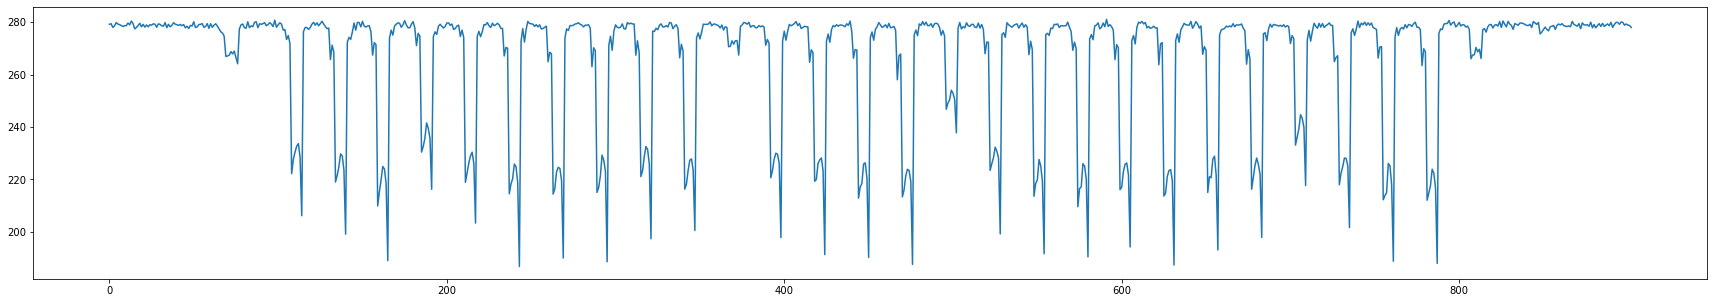

In [198]:
plt.figure(figsize=(horizontal_interval,5))

plt.plot(np.arange(0,columns.shape[0]),columns)

In [ ]:
shape = (gray.shape[0],gray.shape[1])

In [232]:
noisy_gray = gray + 30*abs(np.random.randn(gray.shape[0],gray.shape[1]))
noisy_gray[int(gray.shape[0]/2):,int(gray.shape[1]/2):] += 30*abs(np.random.randn(gray.shape[0] - int(gray.shape[0]/2),gray.shape[1]-int(gray.shape[1]/2)))

Text(0.5, 1.0, 'filtered noisy image')

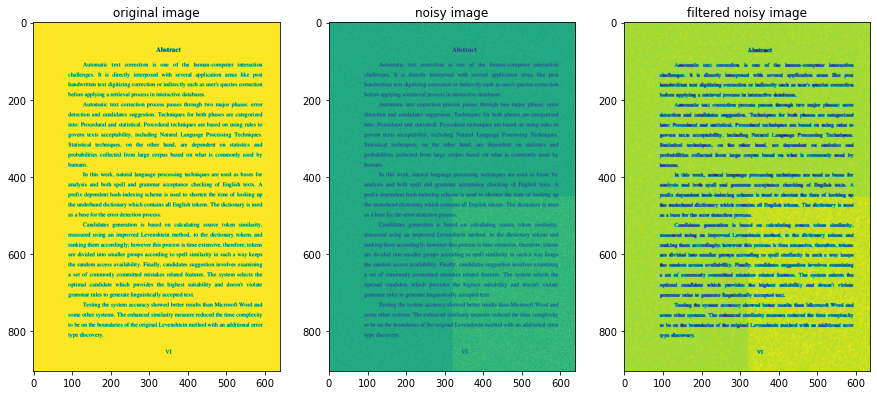

In [248]:
kernel = np.ones((4,4),np.uint8)
morphology = cv2.morphologyEx(noisy_gray, cv2.MORPH_OPEN, kernel)
# cv2.getStructuringElement(gray,cv2.MORPH_OPEN,kernel)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
plt.rcParams["figure.figsize"] = [15,15]

ax1.imshow(gray)
ax1.set_title('original image')

ax2.imshow(noisy_gray)
ax2.set_title('noisy image')

ax3.imshow(morphology)
ax3.set_title('filtered noisy image')


Text(0.5, 1.0, 'filtered noisy image')

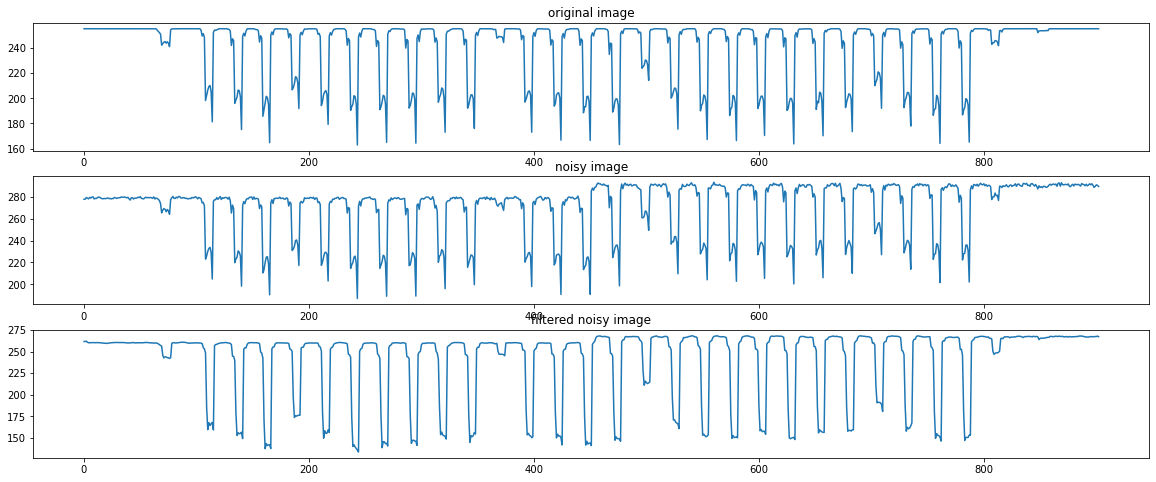

In [246]:
# plt.figure(figsize=(2,2))
plt.rcParams["figure.figsize"] = [20,8]

columns = noisy_gray.mean(axis = 1)

fig, (ax1, ax2 ,ax3) = plt.subplots(3, 1)
ax1.plot(np.arange(0,columns.shape[0]),gray.mean(axis = 1))
ax1.set_title('original image')

ax2.plot(np.arange(0,columns.shape[0]),noisy_gray.mean(axis = 1))
ax2.set_title('noisy image')

ax3.plot(np.arange(0,columns.shape[0]),morphology.mean(axis = 1))
ax3.set_title('filtered noisy image')




Text(0.5, 1.0, 'filtered noisy image')

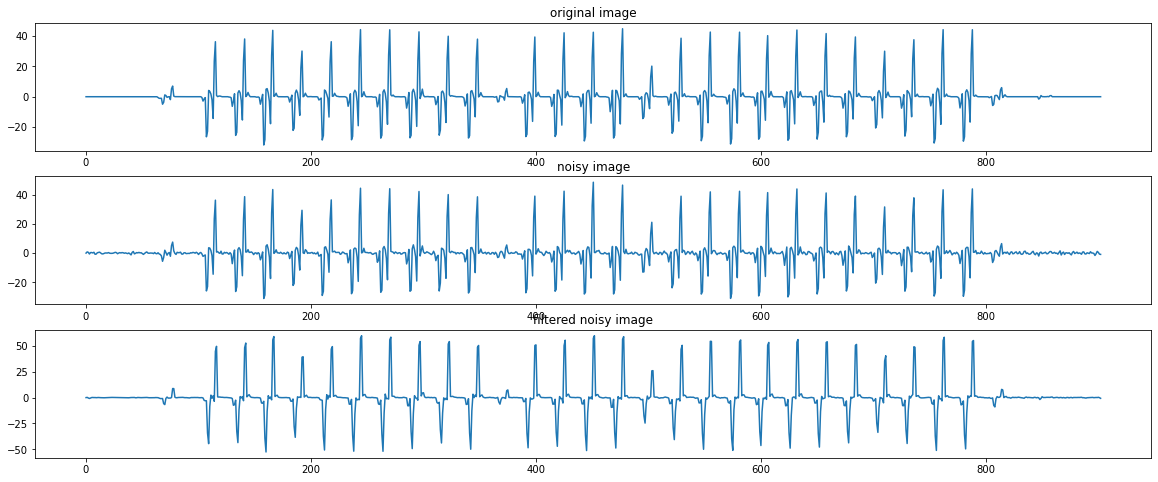

In [265]:
# plt.figure(figsize=(2,2))
plt.rcParams["figure.figsize"] = [20,8]

columns = noisy_gray.mean(axis = 1)

fig, (ax1, ax2 ,ax3) = plt.subplots(3, 1)
ax1.plot(np.arange(0,columns.shape[0]),np.gradient(gray.mean(axis = 1)))
ax1.set_title('original image')

ax2.plot(np.arange(0,columns.shape[0]),np.gradient(noisy_gray.mean(axis = 1)))
ax2.set_title('noisy image')

ax3.plot(np.arange(0,columns.shape[0]),np.gradient(morphology.mean(axis = 1)))
ax3.set_title('filtered noisy image')




In [272]:
import pandas as pd
t = pd.Series(columns)

<AxesSubplot:>

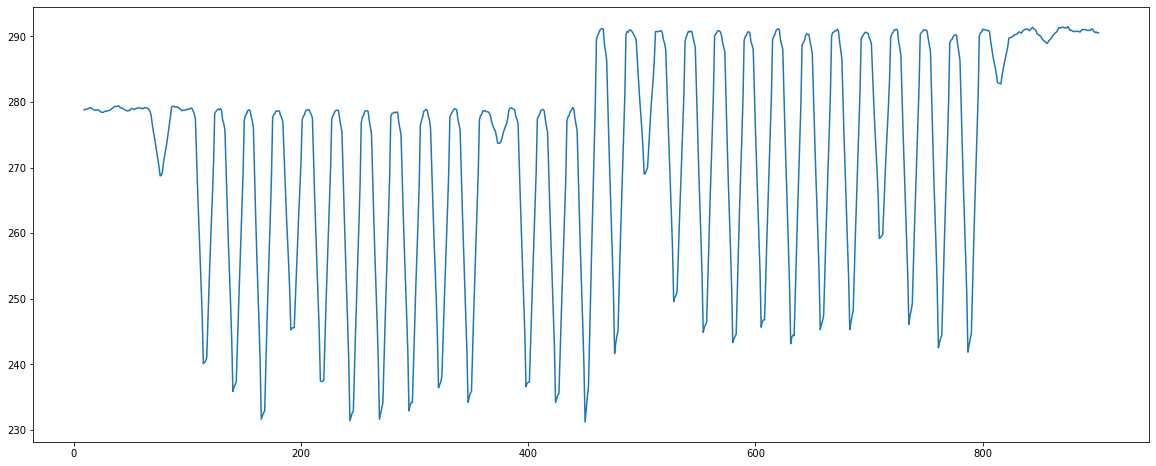

In [273]:
t.rolling(window=10).mean().plot()

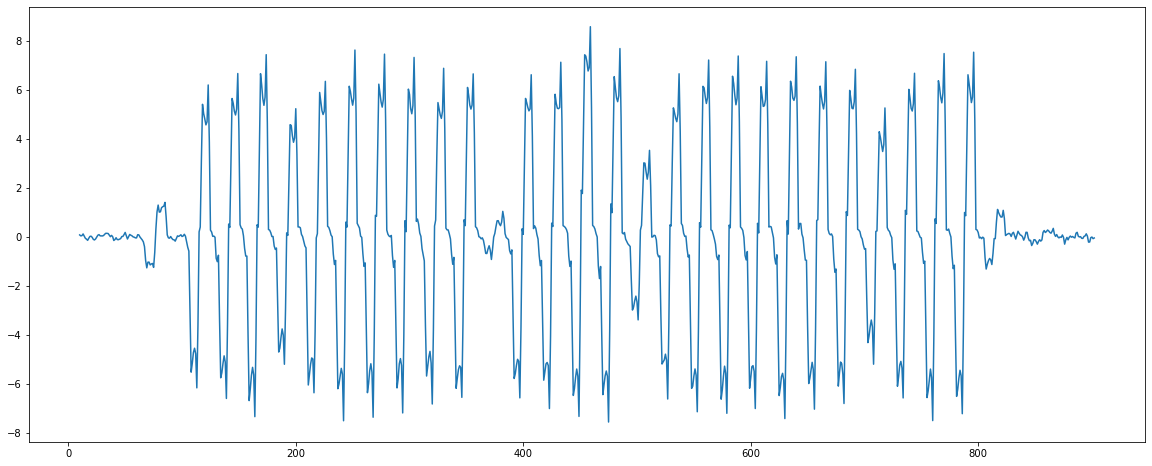

In [278]:
plt.plot(np.gradient(t.rolling(window=10).mean().values))

In [256]:
np.convolve(columns,columns, mode = 'full')

array([ 77157.87563794, 154310.19785349, 232354.17823815, ...,
       252824.89140804, 168178.93139157,  83829.72141416])

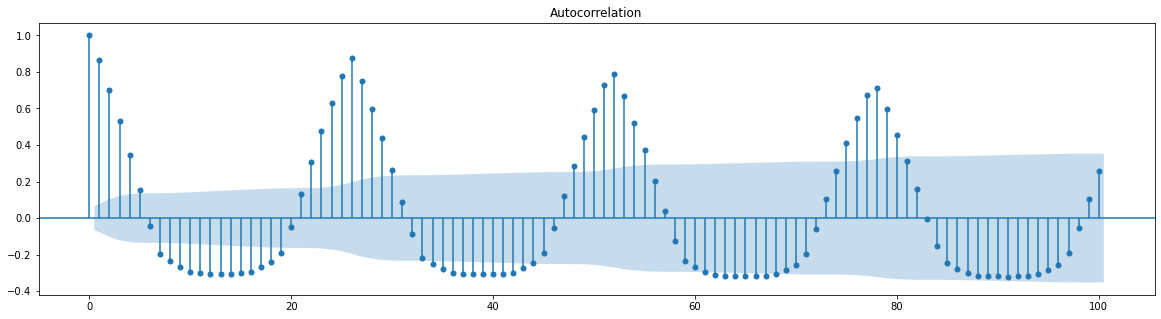

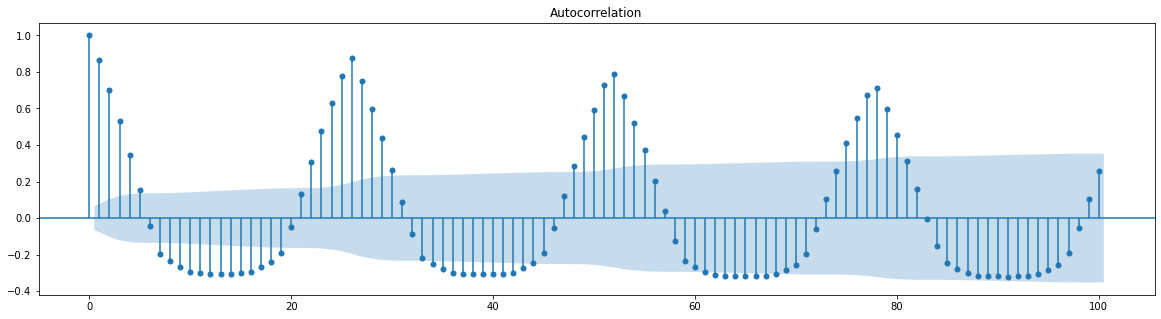

In [260]:
from statsmodels.graphics import tsaplots
plt.rcParams["figure.figsize"] = [20,5]

tsaplots.plot_acf(morphology.mean(axis = 1), lags=100)

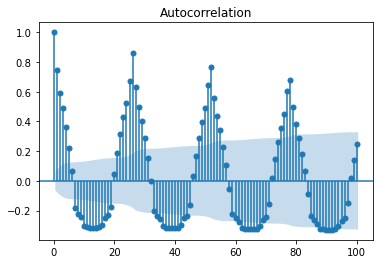

<Figure size 3600x360 with 0 Axes>

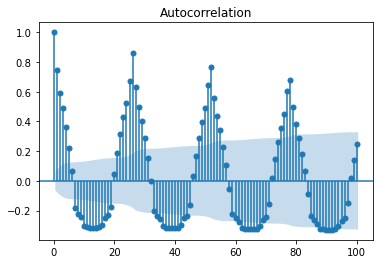

In [175]:
from statsmodels.graphics import tsaplots
plt.figure(figsize=(50,5))

tsaplots.plot_acf(columns, lags=100)

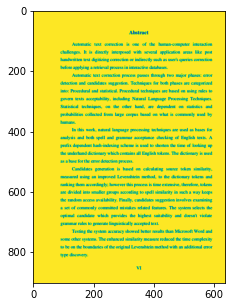

In [120]:
plt.figure(figsize=(horizontal_interval,5))

plt.imshow(gray)